In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# read the ml_1m data
# movie dataset
movies_ml_m1 = pd.read_csv('../data/raw/ml-1m/movies.dat', sep='::', engine='python', header=None, encoding='latin-1')

# user dataset
users_ml_m1 = pd.read_csv('../data/raw/ml-1m/users.dat', sep='::', engine='python', header=None, encoding='latin-1')

# rating dataset
ratings_ml_m1 = pd.read_csv('../data/raw/ml-1m/ratings.dat', sep='::', engine='python', header=None, encoding='latin-1')

In [36]:
ratings_ml_m1.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
users_ml_m1.columns = ['user_id', 'gender', 'age', 'occupation', 'zip_code']
movies_ml_m1.columns = ['movie_id', 'title', 'genres']

In [37]:
# convert gender to binary
users_ml_m1['gender'] = users_ml_m1['gender'].map({'M': 0, 'F': 1})

In [38]:
occupation_map = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

In [39]:
age_map = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

In [40]:
users_ml_m1['AgeRange'] = users_ml_m1['age'].map(age_map)
users_ml_m1['Occupation'] = users_ml_m1['occupation'].map(occupation_map)

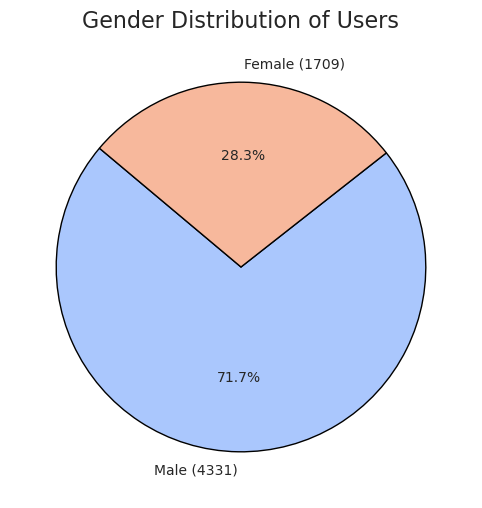

In [41]:
# Gender distribution of users
# Calculate the counts for each gender
gender_counts = users_ml_m1['gender'].value_counts()

# Define the labels and colors
labels = [f'{label} ({count})' for label, count in zip(['Male', 'Female'], gender_counts)]
colors = sns.color_palette('coolwarm', len(labels))

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Gender Distribution of Users', fontsize=16)
plt.show()

In [42]:
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']
# Age distribution of users

users_ml_m1['AgeRange'] = pd.Categorical(users_ml_m1['AgeRange'], categories=age_order, ordered=True)

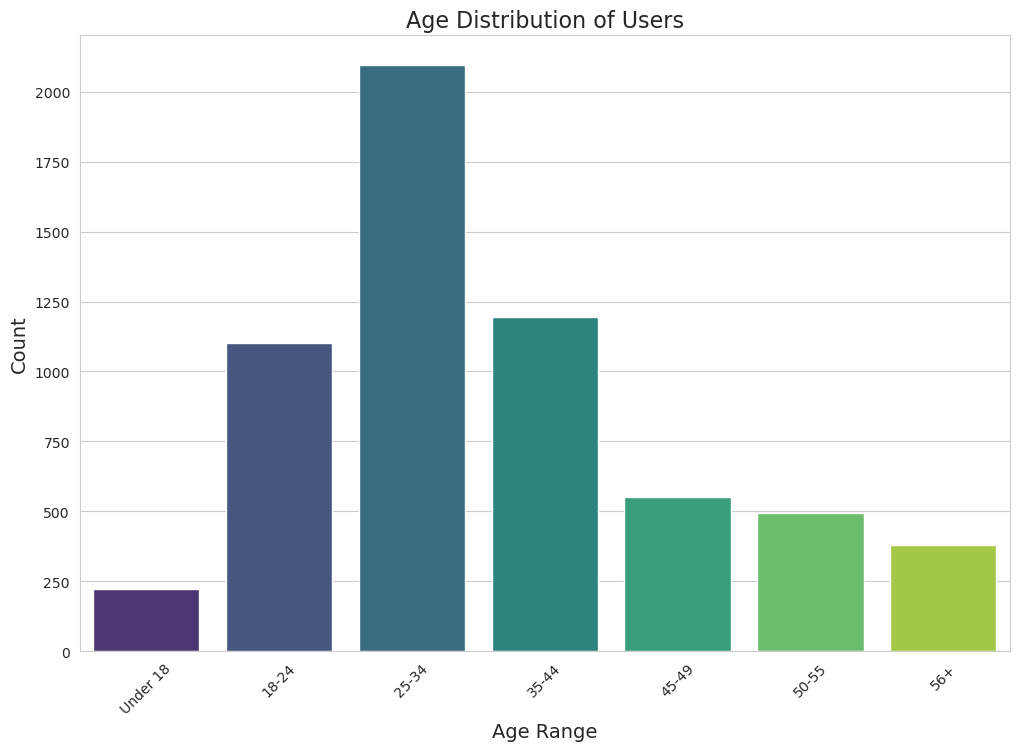

In [43]:
# Set AgeRange as a categorical type with a specified order
age_order = ["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"]
users_ml_m1['AgeRange'] = pd.Categorical(users_ml_m1['AgeRange'], categories=age_order, ordered=True)

# Plot Age Distribution
plt.figure(figsize=(12, 8))
sns.countplot(data=users_ml_m1, x='AgeRange', hue='AgeRange', palette='viridis', order=age_order)
plt.title('Age Distribution of Users', fontsize=16)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

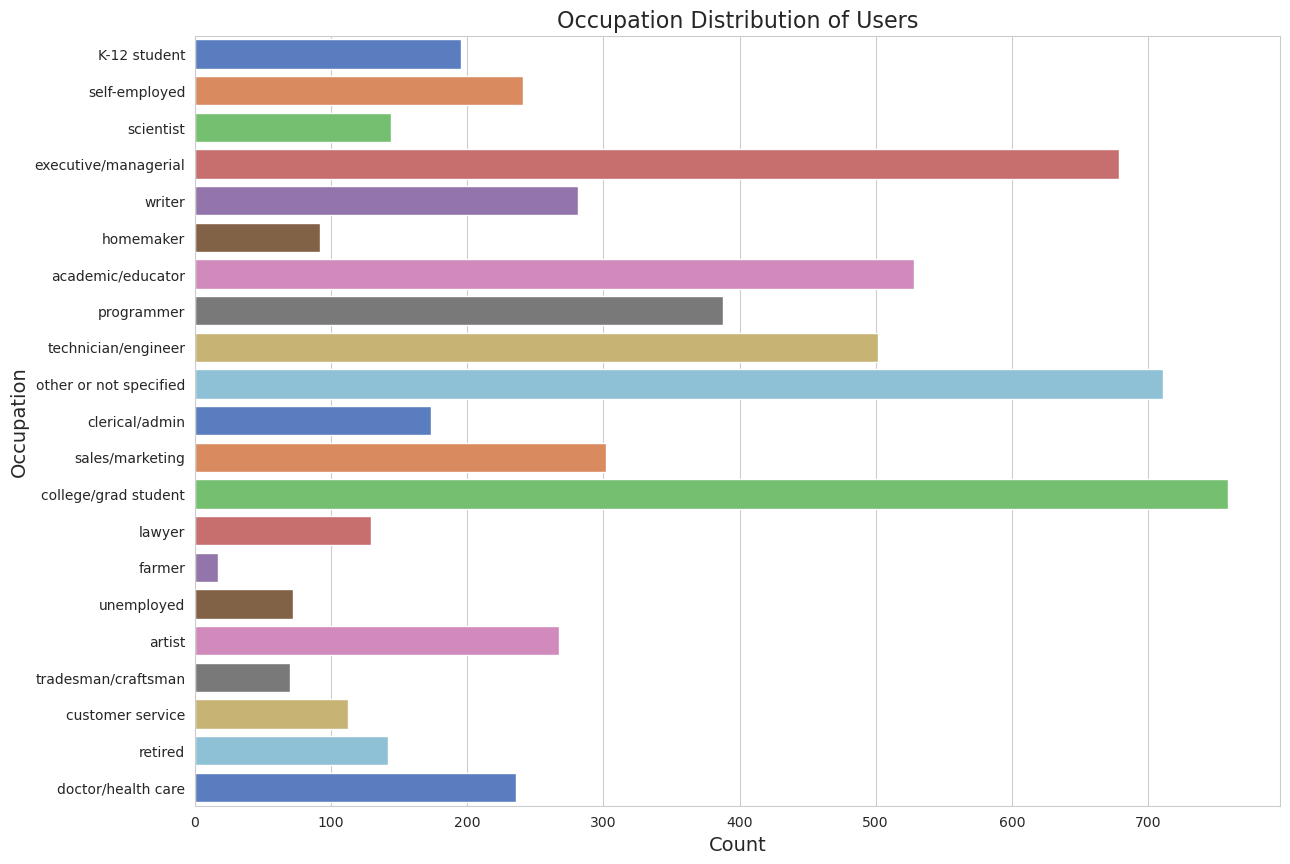

In [44]:
plt.figure(figsize=(14, 10))
sns.countplot(data=users_ml_m1, y='Occupation', hue='Occupation', palette='muted')
plt.title('Occupation Distribution of Users', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Occupation', fontsize=14)
plt.show()

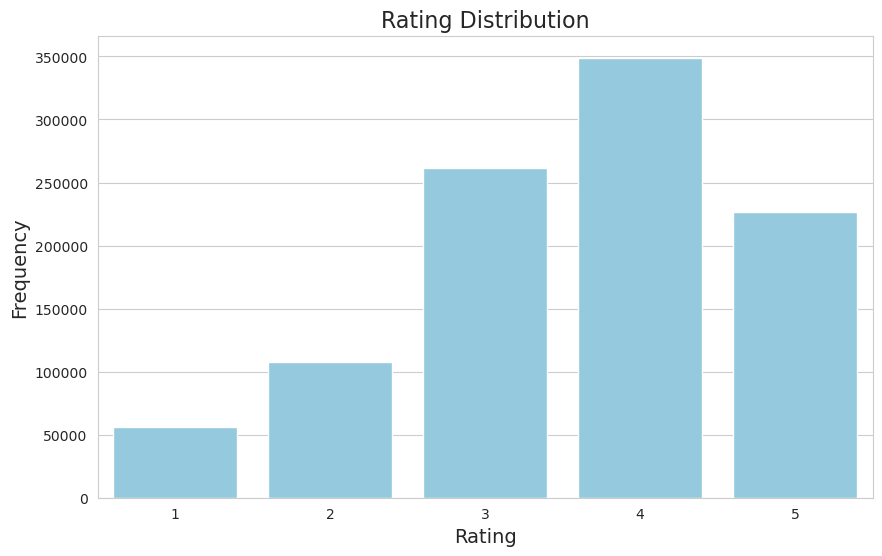

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ratings_ml_m1, x='rating',color='skyblue')
plt.title('Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


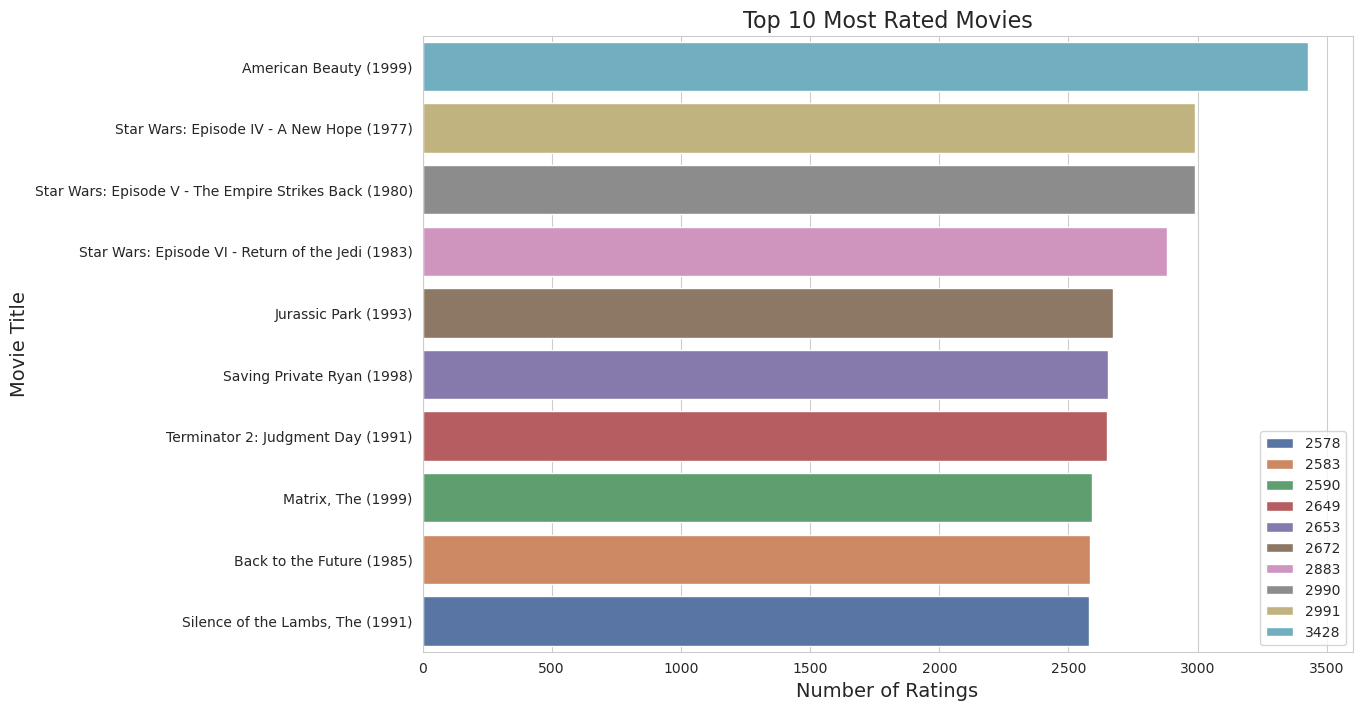

In [46]:
# Most rated movies
movie_ratings_counts = ratings_ml_m1.groupby('movie_id').size().sort_values(ascending=False).head(10)
top_rated_movies = movies_ml_m1[movies_ml_m1['movie_id'].isin(movie_ratings_counts.index)]
top_rated_movies = top_rated_movies.set_index('movie_id')
movie_ratings_counts = movie_ratings_counts.rename(index=top_rated_movies['title'])

plt.figure(figsize=(12, 8))
sns.barplot(y=movie_ratings_counts.index, x=movie_ratings_counts.values, hue=movie_ratings_counts.values, palette='deep')
plt.title('Top 10 Most Rated Movies', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.show()



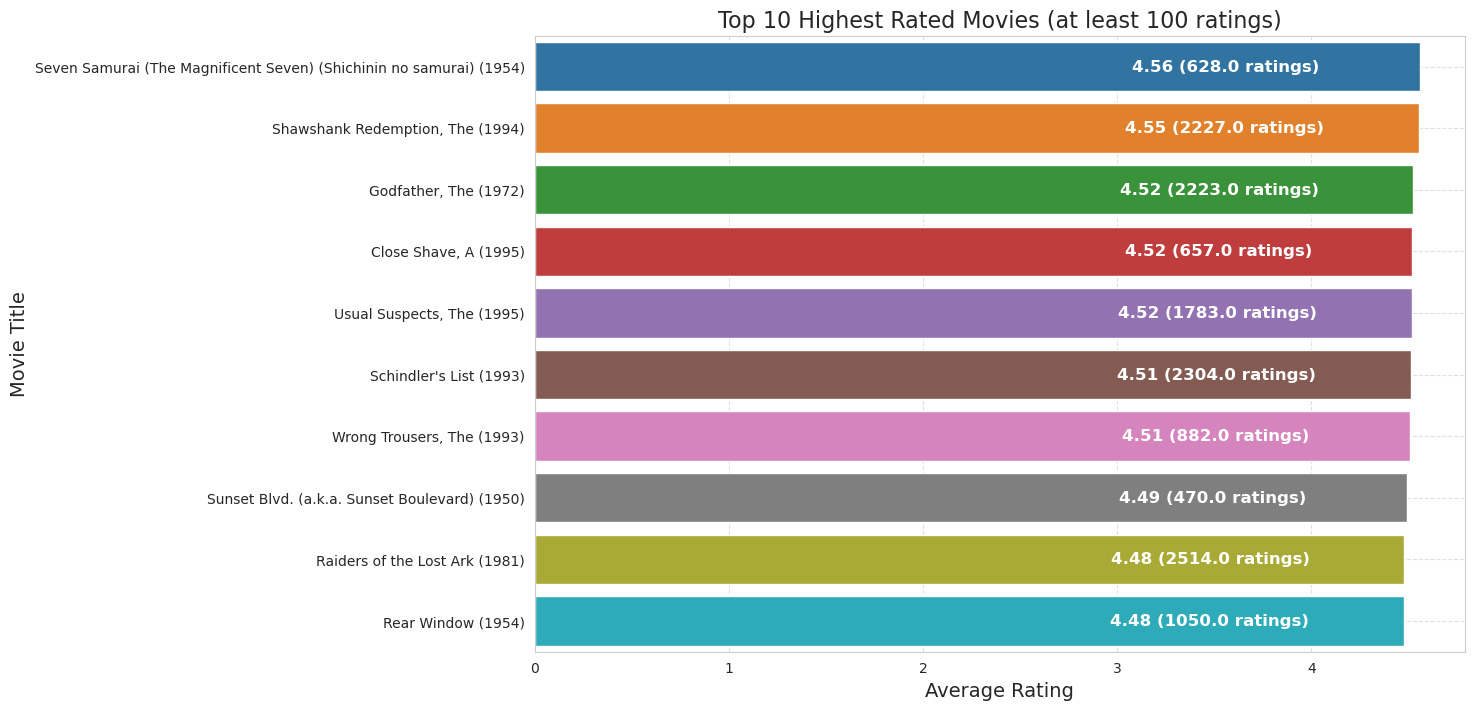

In [47]:
# Merge the ratings and movie titles
merged_df = pd.merge(ratings_ml_m1, movies_ml_m1, on='movie_id')

# Calculate the mean rating and count of ratings for each movie
movie_stats = merged_df.groupby('title').agg(mean_rating=('rating', 'mean'), rating_count=('rating', 'size'))

# Filter to include only movies with at least 100 ratings
popular_movies = movie_stats[movie_stats['rating_count'] >= 100]

# Get the top 10 highest rated movies
top_rated_movies = popular_movies.sort_values(by='mean_rating', ascending=False).head(10)

# Plot the top 10 highest rated movies
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(y=top_rated_movies.index, x=top_rated_movies['mean_rating'], hue=top_rated_movies.index)

plt.gca().set_facecolor('white')
plt.grid(True, linestyle='--', alpha=0.6)

# Add rating values and counts to the bars
for index, row in top_rated_movies.iterrows():
    plt.text(row['mean_rating'] - 1, index, f'{row["mean_rating"]:.2f} ({row["rating_count"]} ratings)',
             color='white', ha="center", va="center", fontsize=12, fontweight='bold')

plt.title('Top 10 Highest Rated Movies (at least 100 ratings)', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.show()

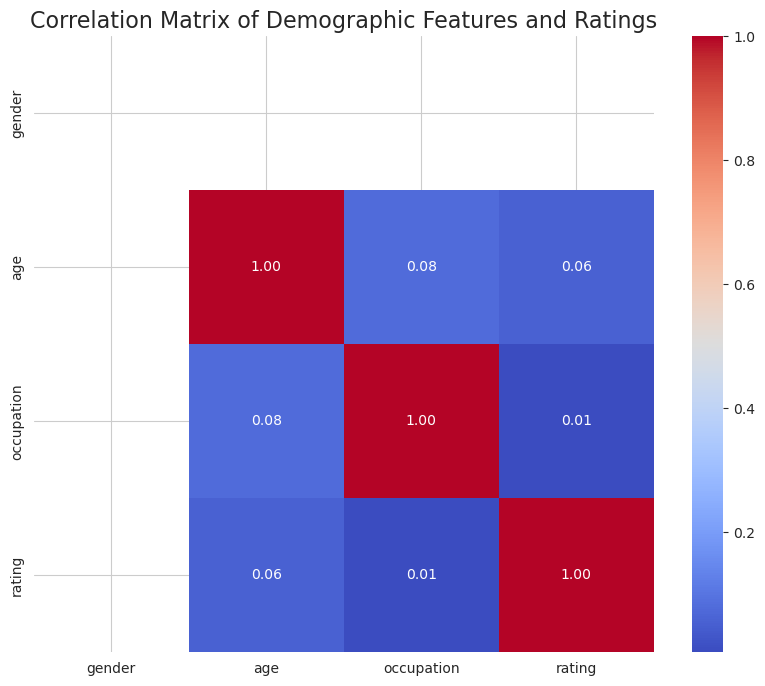

In [48]:
# Prepare data for correlation analysis
demographic_ratings = pd.merge(ratings_ml_m1, users_ml_m1, on='user_id')
demographic_ratings['gender'] = demographic_ratings['gender'].map({'M': 0, 'F': 1})
demographic_ratings['age'] = demographic_ratings['age'].astype(int)
demographic_ratings['occupation'] = demographic_ratings['occupation'].astype(int)
corr_matrix = demographic_ratings[['gender', 'age', 'occupation', 'rating']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Demographic Features and Ratings', fontsize=16)
plt.show()

In [49]:
# One-hot encode the Genres
genres_split = movies_ml_m1['genres'].str.get_dummies(sep='|')
movies_ml_m1 = pd.concat([movies_ml_m1, genres_split], axis=1)

## Genre Model for User Preferences

In [50]:
# Merge the datasets
merged_data = pd.merge(pd.merge(ratings_ml_m1, users_ml_m1, on='user_id'), movies_ml_m1, on='movie_id')

In [51]:
# Extract genres for each user
genre_columns = genres_split.columns.tolist()
user_genres = merged_data.groupby('user_id')[genre_columns].max().reset_index()

# Calculate the total number of movies rated by each user
user_total_ratings = merged_data.groupby('user_id').size().reset_index(name='total_ratings')

# Merge this information back into the merged_data DataFrame
merged_data_for_genre_training = merged_data.merge(user_total_ratings, on='user_id')


In [52]:
user_genre_counts = merged_data_for_genre_training.groupby('user_id')[genre_columns].sum()

In [53]:
# Function to create a binary representation of the top three genres
def get_top_five_binary(row):
    # Sort the genres by count in descending order
    top_genres = row.sort_values(ascending=False).index[:5]
    # Create a binary representation
    binary_representation = row.copy()
    binary_representation[:] = 0
    binary_representation[top_genres] = 1
    return binary_representation

# Apply the function to get top three genres in binary format for each user
user_top_genres_binary = user_genre_counts.apply(get_top_five_binary, axis=1)

# Reset index to add user_id as a column
user_top_genres_binary = user_top_genres_binary.reset_index()

In [54]:
# Merge the binary genre preferences with the original dataset
merged_data_with_preferences = users_ml_m1.merge(
    user_top_genres_binary, on='user_id')

In [55]:
# train onehot encoded data for Occupation and AgeRange
from sklearn.preprocessing import OneHotEncoder

# Extract the occupation and age columns
ages_onehot_encode = merged_data_with_preferences['AgeRange'].values.reshape(-1, 1)
occupations_onehot_encode = merged_data_with_preferences['Occupation'].values.reshape(-1, 1)

# Initialize the OneHotEncoder
age_ohe = OneHotEncoder()
occupation_ohe = OneHotEncoder()

# Fit and transform the data
age_encoded = age_ohe.fit_transform(ages_onehot_encode).toarray()
occupation_encoded = occupation_ohe.fit_transform(occupations_onehot_encode).toarray()

# Create a DataFrame for the one-hot encoded data
age_encoded_df = pd.DataFrame(age_encoded, columns=age_ohe.get_feature_names_out(['AgeRange']))
occupation_encoded_df = pd.DataFrame(occupation_encoded, columns=occupation_ohe.get_feature_names_out(['Occupation']))

# Concatenate the one-hot encoded data with the original DataFrame
merged_data_with_preferences = pd.concat([merged_data_with_preferences, age_encoded_df, occupation_encoded_df], axis=1)

# Drop the original occupation and age columns
merged_data_with_preferences.drop(columns=['Occupation', 'AgeRange'], inplace=True)

In [56]:
# one-hot encode the occupation and age
# merged_data_with_preferences = pd.get_dummies(merged_data_with_preferences, columns=['Occupation', 'AgeRange'])

In [57]:
# Define the features and target variables
X_user_data_with_preferences_top_three = merged_data_with_preferences.drop(columns=['user_id', 'zip_code', 'age', 'occupation']+genre_columns)
y_user_data_with_preferences_top_three = merged_data_with_preferences[genre_columns]

In [58]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_user_data_with_preferences_top_three, y_user_data_with_preferences_top_three, test_size=0.15, random_state=42)

In [59]:
# Train the model
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

clf = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

# Train the model
cv_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_weighted')

In [60]:
# Fit the model
clf.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [61]:
# Predict genres
y_pred = clf.predict(X_test)

In [62]:
# Evaluate the model
report = classification_report(y_test, y_pred, target_names=genre_columns, output_dict=True, zero_division=1)

In [63]:
# Print the classification report
# print(report)

In [64]:
print('Mean F1 Score:', np.mean(cv_score))

Mean F1 Score: 0.6910316131687443


In [65]:
print(report)

{'Action': {'precision': 0.8524404086265607, 'recall': 0.9816993464052287, 'f1-score': 0.9125151883353585, 'support': 765.0}, 'Adventure': {'precision': 0.5, 'recall': 0.04, 'f1-score': 0.07407407407407407, 'support': 250.0}, 'Animation': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, "Children's": {'precision': 0.6, 'recall': 0.07317073170731707, 'f1-score': 0.13043478260869565, 'support': 123.0}, 'Comedy': {'precision': 0.9116022099447514, 'recall': 0.9987893462469734, 'f1-score': 0.9532062391681109, 'support': 826.0}, 'Crime': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 98.0}, 'Documentary': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10.0}, 'Drama': {'precision': 0.8990011098779135, 'recall': 0.995085995085995, 'f1-score': 0.9446064139941691, 'support': 814.0}, 'Fantasy': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 15.0}, 'Film-Noir': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 19.0}, 'Hor

In [66]:
# output the model
import joblib

# Save the model
joblib.dump(clf, '../models/genre_model_based_number_of_rating.pkl')

# Save the OneHotEncoders
joblib.dump(age_ohe, '../models/age_ohe.pkl')
joblib.dump(occupation_ohe, '../models/occupation_ohe.pkl')

# Save the genre columns
joblib.dump(genre_columns, '../models/genre_columns.pkl')

# save the age_map
joblib.dump(age_map, '../models/age_map.pkl')

['../models/age_map.pkl']